In [1]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import sys, os
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
import time
from MPCLandControl import MPCLandControl
from src.rocket import Rocket, perturb_rocket
from src.pos_rocket_vis import *

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir,"rocket.yaml")

# Rocket setup
Ts  = 1/20
rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
rocket.mass = 1.7 # Do not change!!!

# Visualization setup
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1

In [162]:
sim_time = 10  # simulation length in seconds
x0 = np.array([0.0]*5 + [np.deg2rad(30)] + [0.0]*3 + [3.0, 2.0, 10.0])
x_ref = np.array([0.0]*9 + [1.0, 0.0, 3.0])
xs, us = rocket.trim(x_ref)
print("Linearization around a steady state:")
print("x_ref = ", x_ref)
print("xs = ", xs)
print("us = ", us)
A, B = rocket.linearize(xs, us)

# MPC parameters
H = 4
# Merge four linear mpc
mpc = MPCLandControl().new_controller(rocket, Ts, H, x_ref=x_ref)

Linearization around a steady state:
x_ref =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
xs =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
us =  [ 0.          0.         56.66666667  0.        ]
Maximum invariant set successfully computed after 28 iterations.
Maximum invariant set successfully computed after 29 iterations.
Minimal robust invariant set computation did NOT converge after 50 iterations.
Maximum invariant set successfully computed after 17 iterations.
Maximum invariant set successfully computed after 26 iterations.
Maximum invariant set successfully computed after 1 iterations.


Simulating time 0.00
[0. 0. 0. 2.]
[0.07930857 0.0026987  0.0187273  2.00047213]
[0.14269755 0.01025415 0.0318195  2.00174686]
[0.19036128 0.02161303 0.03796298 2.00350804]
[0.22285481 0.03578388 0.03624257 2.00538392]
[0.24105196 0.0518474  0.02610923 2.00696621]
[0.2460808  0.06896333 0.00734493 2.00782758]
[ 0.2392604   0.08637446 -0.01997365  2.00753726]
[ 0.22205763  0.10340881 -0.05550884  2.00567498]
[ 0.19602288  0.11948039 -0.09869937  2.00184308]
[ 0.16274346  0.13408864 -0.14879637  1.99567677]
[ 0.12381434  0.14681713 -0.2048964   1.98685271]
[ 0.08079884  0.15733171 -0.26597608  1.97509587]
[ 0.03519842  0.16537804 -0.33092471  1.96018467]
[-0.01146779  0.17078106 -0.39855861  1.94195502]
[-0.05791941  0.17344109 -0.46768852  1.92030229]
[-0.10293407  0.17332875 -0.53711622  1.8951816 ]
[-0.14655153  0.1704489  -0.60736318  1.86656496]
[-0.18858841  0.1648101  -0.67890267  1.83439918]
[-0.22746053  0.15647399 -0.75004662  1.79866159]
Simulating time 1.00
[-0.26176713  0.14

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=199, step=2), IntSlider(value=0…

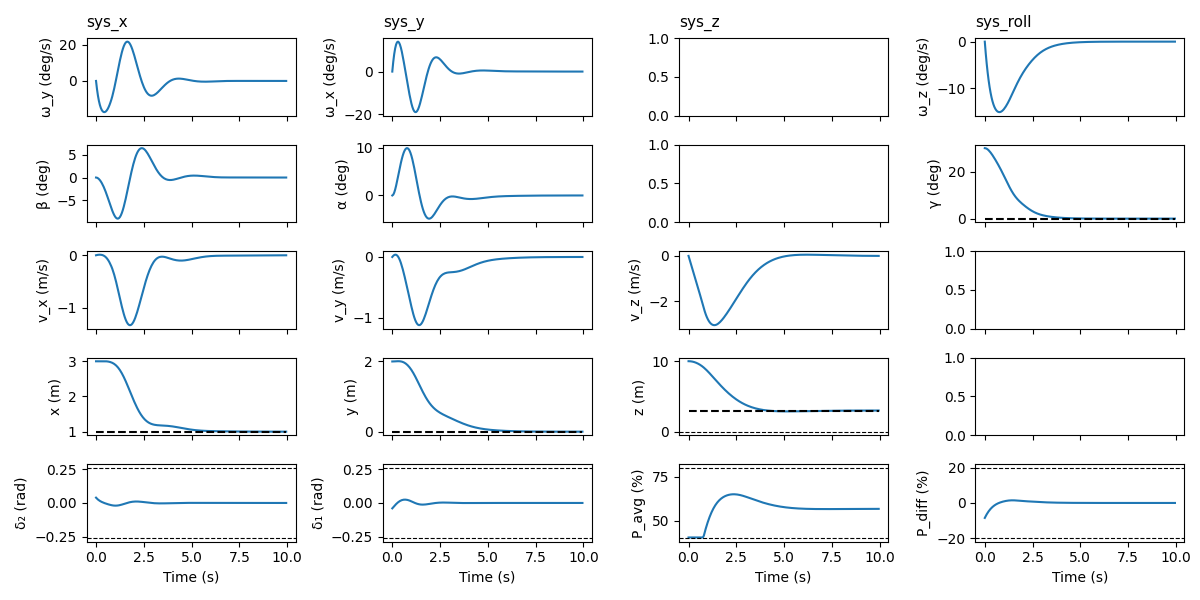

In [163]:
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol = rocket.simulate_land(mpc, sim_time, H, x0)
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl, T_ol=t_ol[...,:-1], X_ol=x_ol, U_ol=u_ol)
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl, xs)